### Visualize the NTP performance at different model sparsity settings

In [1]:
import matplotlib.pyplot as plt
import re

In [59]:
datasets = ["stl", "cifar10"]
file_directory = "../../logs/resnet18/"

In [60]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [61]:
import numpy as np

def read_file(file_path):
    results = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                if data_volume not in results:
                    results[data_volume] = [accuracy]
                else:
                    results[data_volume].append(accuracy)
        for key in results:
            results[key] = np.array(results[key])
        return results

In [62]:
source = 'cifar10'
target = 'stl'
seed = 3
sparsity = [0.5, 0.8, 0.9, 0.95, 0.99]

sparsity_results = {}
for s in sparsity:
    org_path = file_directory + f"lda/{seed}/{s}/admm_" + source + "_to_" + target + ".log"
    org_dic = read_file(org_path)
    print(org_dic)
    sparsity_results[s] = org_dic


{5.0: array([0.151375, 0.161875, 0.161875]), 10.0: array([0.144625, 0.151875, 0.152625]), 25.0: array([0.192125, 0.19525 , 0.195   ]), 40.0: array([0.21725 , 0.180625, 0.180375]), 50.0: array([0.229625, 0.200375, 0.200875]), 250.0: array([0.368875, 0.347   , 0.346875]), 500.0: array([0.48775, 0.50225, 0.50125]), 1000.0: array([0.5645  , 0.5825  , 0.583125]), 2500.0: array([0.62775 , 0.636625, 0.63675 ]), 5000.0: array([0.66225 , 0.662125, 0.666   ])}
{5.0: array([0.147625, 0.166125, 0.166125]), 10.0: array([0.15525 , 0.162375, 0.162375]), 25.0: array([0.203625, 0.19375 , 0.19375 ]), 40.0: array([0.216125, 0.207   , 0.207   ]), 50.0: array([0.246625, 0.215625, 0.216   ]), 250.0: array([0.368125, 0.37475 , 0.374875]), 500.0: array([0.477625, 0.511125, 0.511125]), 1000.0: array([0.552875, 0.573625, 0.573   ]), 2500.0: array([0.621125, 0.626875, 0.628   ]), 5000.0: array([0.6605, 0.6535, 0.6505])}
{5.0: array([0.16725 , 0.166125, 0.166125]), 10.0: array([0.16575 , 0.183125, 0.183125]), 25.

dict_values([array([0.151375, 0.161875, 0.161875]), array([0.144625, 0.151875, 0.152625]), array([0.192125, 0.19525 , 0.195   ]), array([0.21725 , 0.180625, 0.180375]), array([0.229625, 0.200375, 0.200875]), array([0.368875, 0.347   , 0.346875]), array([0.48775, 0.50225, 0.50125]), array([0.5645  , 0.5825  , 0.583125]), array([0.62775 , 0.636625, 0.63675 ]), array([0.66225 , 0.662125, 0.666   ])])
dict_values([array([0.147625, 0.166125, 0.166125]), array([0.15525 , 0.162375, 0.162375]), array([0.203625, 0.19375 , 0.19375 ]), array([0.216125, 0.207   , 0.207   ]), array([0.246625, 0.215625, 0.216   ]), array([0.368125, 0.37475 , 0.374875]), array([0.477625, 0.511125, 0.511125]), array([0.552875, 0.573625, 0.573   ]), array([0.621125, 0.626875, 0.628   ]), array([0.6605, 0.6535, 0.6505])])
dict_values([array([0.16725 , 0.166125, 0.166125]), array([0.16575 , 0.183125, 0.183125]), array([0.210375, 0.220375, 0.220375]), array([0.218625, 0.192   , 0.191875]), array([0.223875, 0.215   , 0.215

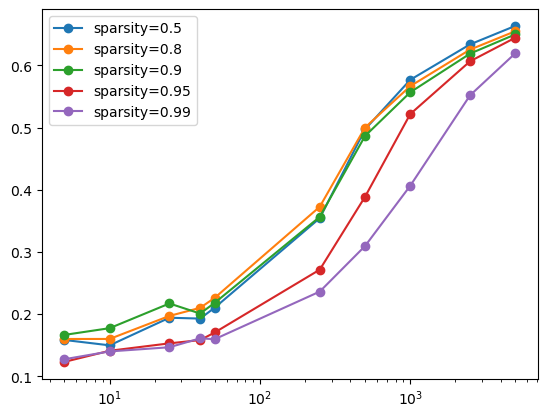

In [63]:
for i, s in enumerate(sparsity_results.keys()):
    dic = sparsity_results[s]
    # std = np.std(list(dic.values()), axis=1)
    # print(std)
    print(dic.values())
    mean = np.mean(list(dic.values()), axis=1)
    # Set color mapping
    cmap = plt.get_cmap('tab10')
    plt.plot(list(dic.keys()), mean, label=f"sparsity={s}", color=cmap(i), marker="o")
    # Draw the std using the bars
    # plt.errorbar(list(dic.keys()), mean, yerr=std, fmt='.', color=cmap(i))

    
# log scale
plt.xscale('log')
plt.legend()

In [64]:
# Read the curve for local training 
local_path = file_directory + "local/" + target + ".log"
local_dic = read_file(local_path)

In [67]:
# Read the curve for local training 
transfer_path = file_directory + "transfer/1/" + source + "-" + target + ".log"
transfer_path = read_file(transfer_path)

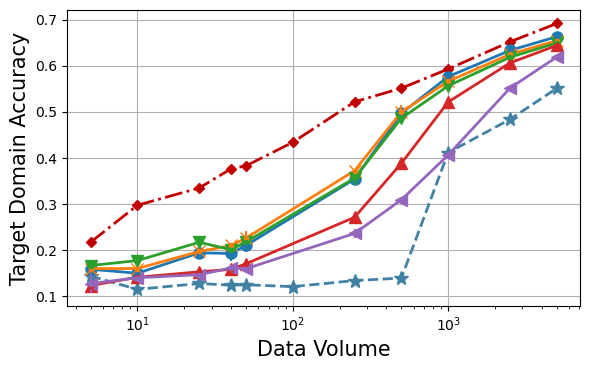

In [68]:
plt.figure(figsize=(6, 4))  # Increase figure size for better clarity

# Plot the curve for local training
std = np.std(list(local_dic.values()), axis=1)
mean = np.mean(list(local_dic.values()), axis=1)
plt.plot(list(local_dic.keys()), mean, label="From Scratch", color="#4181a4", marker="*", linestyle="--", lw=2, markersize=10)

# Plot the curve for transfer learning
std = np.std(list(transfer_path.values()), axis=1)
mean = np.mean(list(transfer_path.values()), axis=1)
plt.plot(list(transfer_path.keys()), mean, label="Transfer", color="#c00000", marker="D", linestyle="-.", lw=2, markersize=5)


# Create a color map once, to be used for all the lines
cmap = plt.get_cmap('tab10')
markers = ['o', 'x', 'v', '^', '<', '>', 'h', 'H', 'D', 'P', '*', '+', '|', '_']
# Plot all the sparsity results
for i, s in enumerate(sparsity_results.keys()):
    dic = sparsity_results[s]
    std = np.std(list(dic.values()), axis=1)
    mean = np.mean(list(dic.values()), axis=1)
    label = f"{s}"  # Shorten label here if necessary
    plt.plot(list(dic.keys()), mean, label=label, color=cmap(i), marker=markers[i], lw=2, markersize=8)
    plt.errorbar(list(dic.keys()), mean, yerr=std, fmt='.', color=cmap(i), alpha=1)


# Apply log scale for x-axis
plt.xscale('log')

# Adjust legend positioning and add title
# legend_title = "Model Sparsity"
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=4, fontsize='medium', title=legend_title, framealpha=0.8)

plt.xlabel("Data Volume", fontsize=15)
plt.ylabel("Target Domain Accuracy", fontsize=15)

plt.grid()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the legend above the plot
# Save the plot to a svg 
plt.savefig("../../imgs/sparsity-resnet18-cifar10-stl.svg")
plt.show()


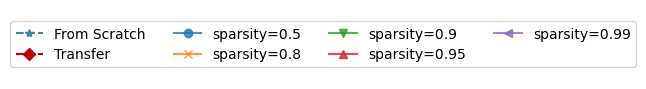

In [71]:
# Draw the legend separately
plt.figure(figsize=(5, 1))  # Increase figure size for better clarity
# Draw the legend separately
plt.plot([], [], color='#4181a4', marker="*", linestyle="--", label="From Scratch")
plt.plot([], [], color='#c00000', marker="D", linestyle="-.", label="Transfer")
for i, s in enumerate(sparsity_results.keys()):
    label = f"sparsity={s}"  # Shorten label here if necessary
    plt.plot([], [], label=label, color=cmap(i), marker=markers[i], alpha=0.8)
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5), ncol=4, fontsize='medium', framealpha=0.8)
plt.axis('off')
plt.tight_layout()
plt.savefig("../../imgs/sparsity-vgg-cifar10-stl-legend.jpeg", bbox_inches='tight', dpi=1200)